# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Mohammadreza Estarki 
2.   Student Number: 400209184


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [199]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [200]:
# Connect to the google drive to to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,X,Y
114,0.210843,0.762405
102,0.524096,0.504688
420,0.680723,0.712934
462,0.841365,0.448230
322,0.817269,0.469543
...,...,...
235,0.311245,0.703561
461,0.987952,0.074484
57,0.975904,0.191313
442,0.955823,0.263031


Train:  (400, 1) (400,)
Test:  (100, 1) (100,)


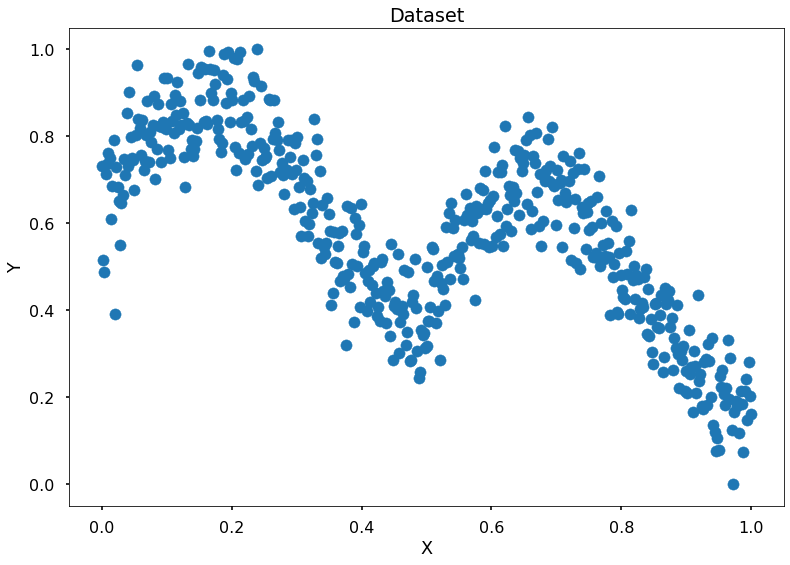

In [201]:
# Loading dataset file (change as you wish) 
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning - HW1/data/data01.csv")
# Making a copy of dataset to work on it.
df=dataset.copy()
df=df.drop("Unnamed: 0",axis=1) # Drop Unnamed column imported as index

# Normalize Data to be between 0 and 1 with min-max formula 
#(Data Normalization improve accuracy and performance of any model)
col = ["X","Y"]
df = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Before everything we want to know shape of data so we plot them 
plt.scatter(df.X, df.Y)
plt.title("Dataset")
plt.ylabel("Y")
plt.xlabel("X")
plt.style.use('seaborn-poster')

# Use Z_test formula to eliminate outliers:
columns = ["X","Y"]
threshold = 3    # a normal threshold for outliers
mu= df[columns].mean()
sd = df[columns].std()
Z=np.abs((df[columns]-mu)/sd)
outliers_index=np.where(Z > threshold)
df.drop(outliers_index[0], axis=0, inplace=True)

# implement the split part
# name them: x_train, x_test, y_train, y_test

# First Shuffling the dataset to avoid bias or variance
# This action improve performance of any model
df_s= df.sample(frac = 1)
display(df_s)

# Turn pandas dataframe to numpy array type
df_s = df_s.to_numpy()

# Splitting data into train and test part. 80% for train and 20% for test
train = df_s[:int(len(df_s) * 0.8)]
test = df_s[int(len(df_s) * 0.8):]

# # Getting features 
x_train = train[: , :-1]
y_train = train[: , -1]

# # Getting labels
x_test = test[: , :-1]
y_test = test[: , -1]

# shapes should be: 
print("Train: ", x_train.shape ,y_train.shape)
print("Test: " ,x_test.shape ,y_test.shape)

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [202]:
# Here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.vstack([x_train.T, np.ones(len(x_train))]).T
y = y_train[:, np.newaxis]
m = np.linalg.pinv(A.T @ A) @ A.T @ y
print('The slope is: m[0]= {}\ny intercept is: m[1]= {}'.format(m[0],m[1]))

The slope is: m[0]= [-0.52114008]
y intercept is: m[1]= [0.84845188]


In [203]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.02215790476905191
MSE test error: 0.021701615780967697


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 0, 'X')

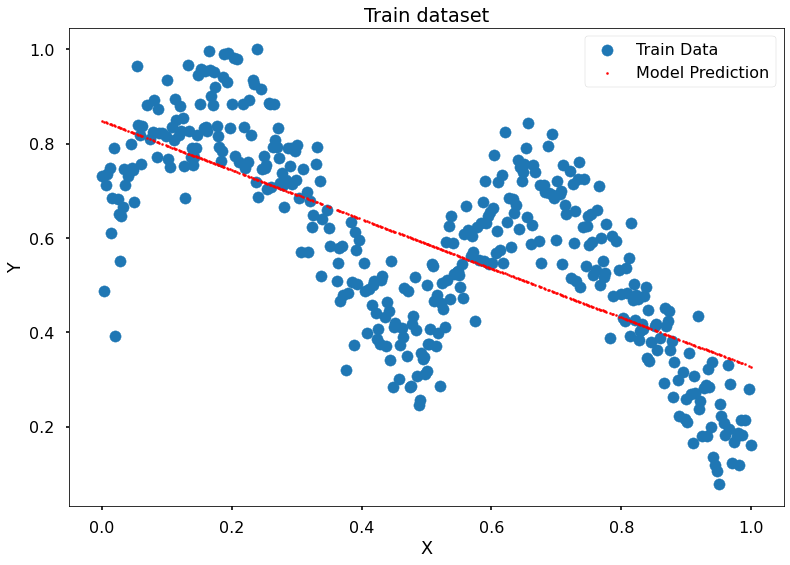

In [204]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], c="r",s=4)
plt.legend(["Train Data","Model Prediction"])
plt.title("Train dataset")
plt.ylabel("Y")
plt.xlabel("X")

Text(0.5, 0, 'X')

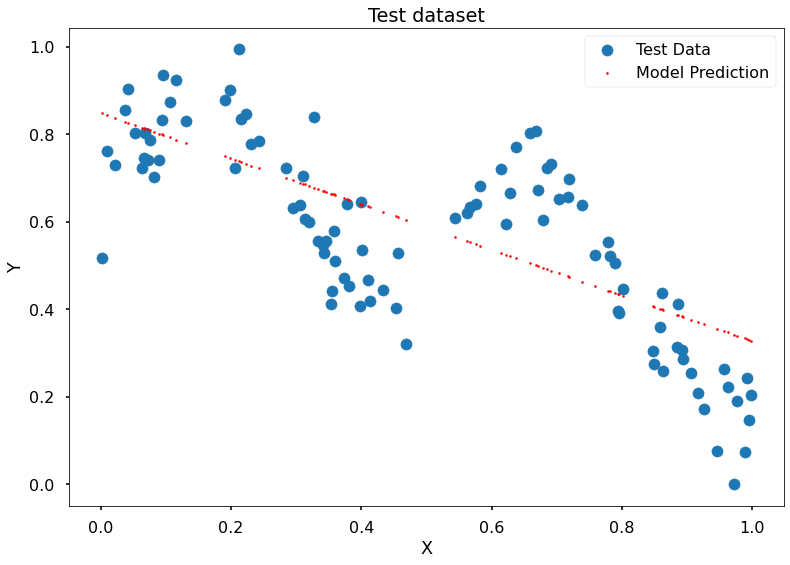

In [205]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1],c="r",s=4)
plt.title("Test dataset")
plt.legend(["Test Data","Model Prediction"])
plt.ylabel("Y")
plt.xlabel("X")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

From the image above it is evident that, there exists a non-linear relationship between X and Y, so we cannot predict this dataset with a linear model regression. train and test errors from this model according to MSE method are 0.021 and 0.0248 respectively, which are far from zero and not acceptable. This model finds the optimum linear regression according to the dataset yet this method is not appropriate for this dataset.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Locally Weighted Linear Regression method should perform better than simple linear regression for the main reason that it gives weights to data which are far from linear regression, allowing a non-linear regression. This non-linear regression could predict new data more accurately. Therefore, we expect this method to outperform the previous method.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [208]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp((-(np.dot((xi-the_query_point), (xi-the_query_point).T))/(2* (hyperparameter**2))).astype(float))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [207]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)

    theta = np.linalg.inv(X.T *(W* X))@(X.T *(W* train_Y))
    pred=np.dot(qx, theta)
    return pred

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [213]:
# First we use 0.5 as hyperparameter and then change it to 0.1 for better performance
hyperparameter=0.5 
predicted_test = [predict(x_train, y_train.reshape(len(y_train),1), query, hyperparameter) for query in x_test]
error = mean_squared_error(y_test, np.asarray(predicted_test).reshape(len(predicted_test),))
#----------------------------------------------------
hyperparameter=0.05
predicted_test_best = [predict(x_train, y_train.reshape(len(y_train),1), query, hyperparameter) for query in x_test]
error_best = mean_squared_error(y_test, np.asarray(predicted_test_best).reshape(len(predicted_test_best),))
#----------------------------------------------------
print(f"MSE test error with hyperparameter=0.5: {error}\nMSE test error with hyperparameter=0.05: {error_best}")

/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)
/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:145: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = N.array(data, dtype=dtype, copy=copy)


MSE test error with hyperparameter=0.5: 0.021286418031916724
MSE test error with hyperparameter=0.05: 0.00680900650429531


Text(0.5, 0, 'X')

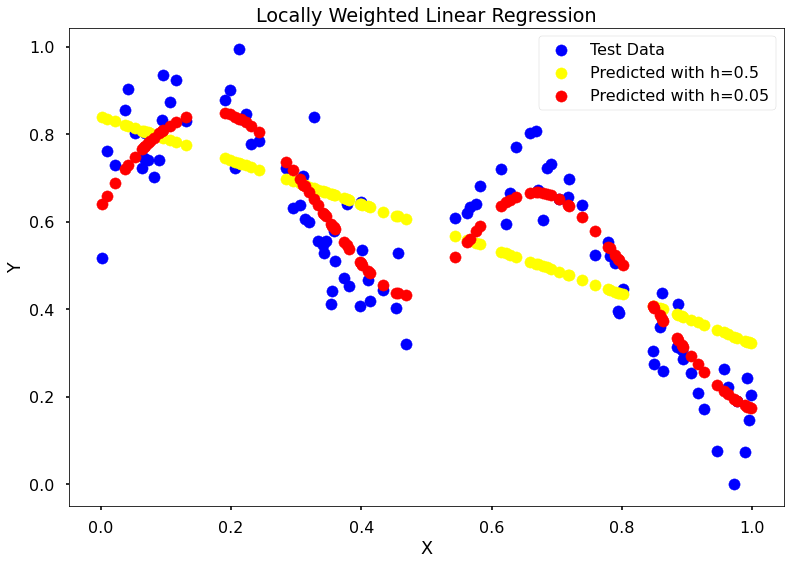

In [214]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")
plt.scatter(x_test, predicted_test_best, c="red")
plt.legend(["Test Data","Predicted with h=0.5","Predicted with h=0.05"])
plt.title("Locally Weighted Linear Regression")
plt.ylabel("Y")
plt.xlabel("X")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

From the image above it is evident that, there is an improvement in this method which is a result of selecting the best hyperparameter. First off, we have selected 0.5 as an input and MSE to be 0.0212. The resulting error was 0.0248 doesn't show significant improvement. Secondly, we selected a lower hyperparameter as 0.05, to improve non-linear properties of the model, and MSE to be 0.0068. The second choosen hyperparameter shows a huge improvement.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Since KNN method considers the k-neighbours of a data and predicts output by the method of average, max or min we expect better performance than previous methods. It is also worth mentioning that linearity or non-linearity doesn't effect on the output of the model since it is based on local dataset.

### Part10:
Implementing the `KNN model`.

In [215]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
      # implement the distance function using Euclidean Function
        distance = np.linalg.norm(x1 - x2)
        return distance

    def return_nn_ids(self, x):
        l,s=(self.X).shape
        dist = np.zeros(l)
        for i in range(l) :             
            dist[i] = self.distance(x, self.X[i])   
        # sort distances to find indices of k neighbours
        indices = dist.argsort()
        return indices[:self.k]


    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        Y_sorted = self.Y[neareest_indices]
        predicted_y = np.mean(Y_sorted)
        return predicted_y

In [216]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test, predicted_y)
    return error, predicted_y

In [217]:
k = 6
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.006986662417462047


Text(0.5, 0, 'X')

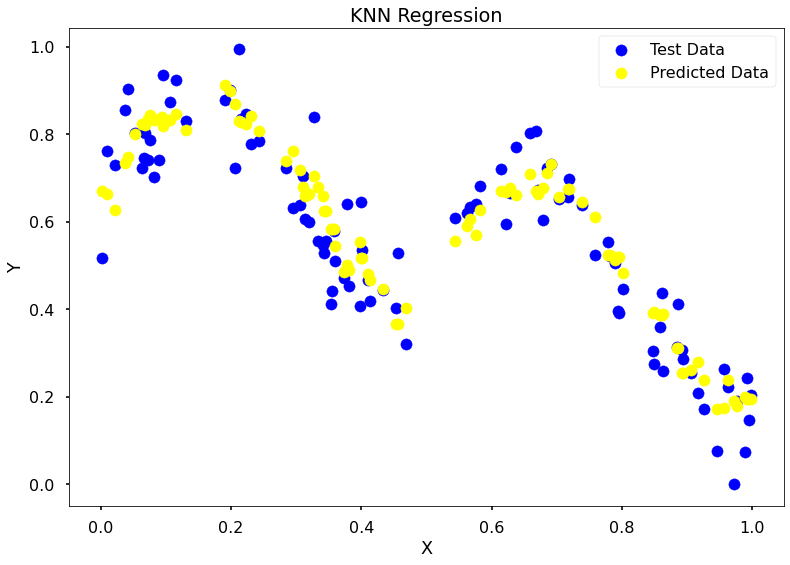

In [218]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")
plt.legend(["Test Data","Predicted Data"])
plt.title("KNN Regression")
plt.ylabel("Y")
plt.xlabel("X")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

As excepted, it is evident that the output in this method outperforms all previous method, with K=6 the model has a MSE of 0.0069. Any attemp in increasing or decreasing the K number will result in a higher MSE due to distribution of neighbouring dataset.